# Introduction and Question:

The broad question we are going to address is: “What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?” The more specific question we are going to address is: “Can age and number of hours played predict whether a player is subscribed to the game-related newsletter?” This will help identify whether age and number of hours are predictive of subscribing to the game-related newsletter.

# Loading in the Data:

In [13]:
library(tidymodels)
library(tidyverse)

In [14]:
set.seed(40)

In [15]:
players_url <- "https://raw.githubusercontent.com/Nyte1706/ds_project/20f5697cc19aad27c319f291e95b5d8504b792b5/players%20(1).csv"
players <- read_csv(players_url)
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


The players.csv dataset includes:
- Indicated experience (character data)
- Whether they are subscribed to a game-related newsletter (logical data)
- The players' hashed email (character data)
- hours played (double data)
- Name (character data)
- Gender (character data)
- Age (double data)

This dataset includes 196 observations. A potential problem with this dataset is that it has the subscription status of the player stored as a logical type of data. This will need to be changed to a factor type of data in order to perform KNN classification. In addition, people may lie about their name, gender, and age.
This data was collected through a minecraft server set up by a research group in computer science at UBC.


A summary of the players.csv dataset indicates that the average number of hours played is ~5.85 hours, and the average age is ~20.52 years old.


In [16]:
mean_values <- summarize(players,
                         mean_hours_played = mean(played_hours), 
                         mean_age = mean(Age, na.rm = TRUE))
mean_values

mean_hours_played,mean_age
<dbl>,<dbl>
5.845918,20.52062


In [19]:
experience_distribution <- players |>
    group_by(experience) |>
    summarize(count = n())
experience_distribution

experience,count
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


In [20]:
gender_distribution <- players |>
    group_by(gender) |>
    summarize(count = n())
gender_distribution

gender,count
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


In [22]:
subscription_distribution <- players |>
    group_by(subscribe) |>
    summarize(count = n())
subscription_distribution

subscribe,count
<lgl>,<int>
FALSE,52
TRUE,144


In [4]:
sessions_url <- "https://raw.githubusercontent.com/Nyte1706/ds_project/20f5697cc19aad27c319f291e95b5d8504b792b5/sessions%20(1).csv"
sessions <- read_csv(sessions_url)
head(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


We will not be using this dataset in this project. 


# Data Visualization:

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `subscribe = fct_recode(subscribe, Yes = "TRUE", No = "FALSE")`.
Caused by warning:
! Unknown levels in `f`: TRUE, FALSE”


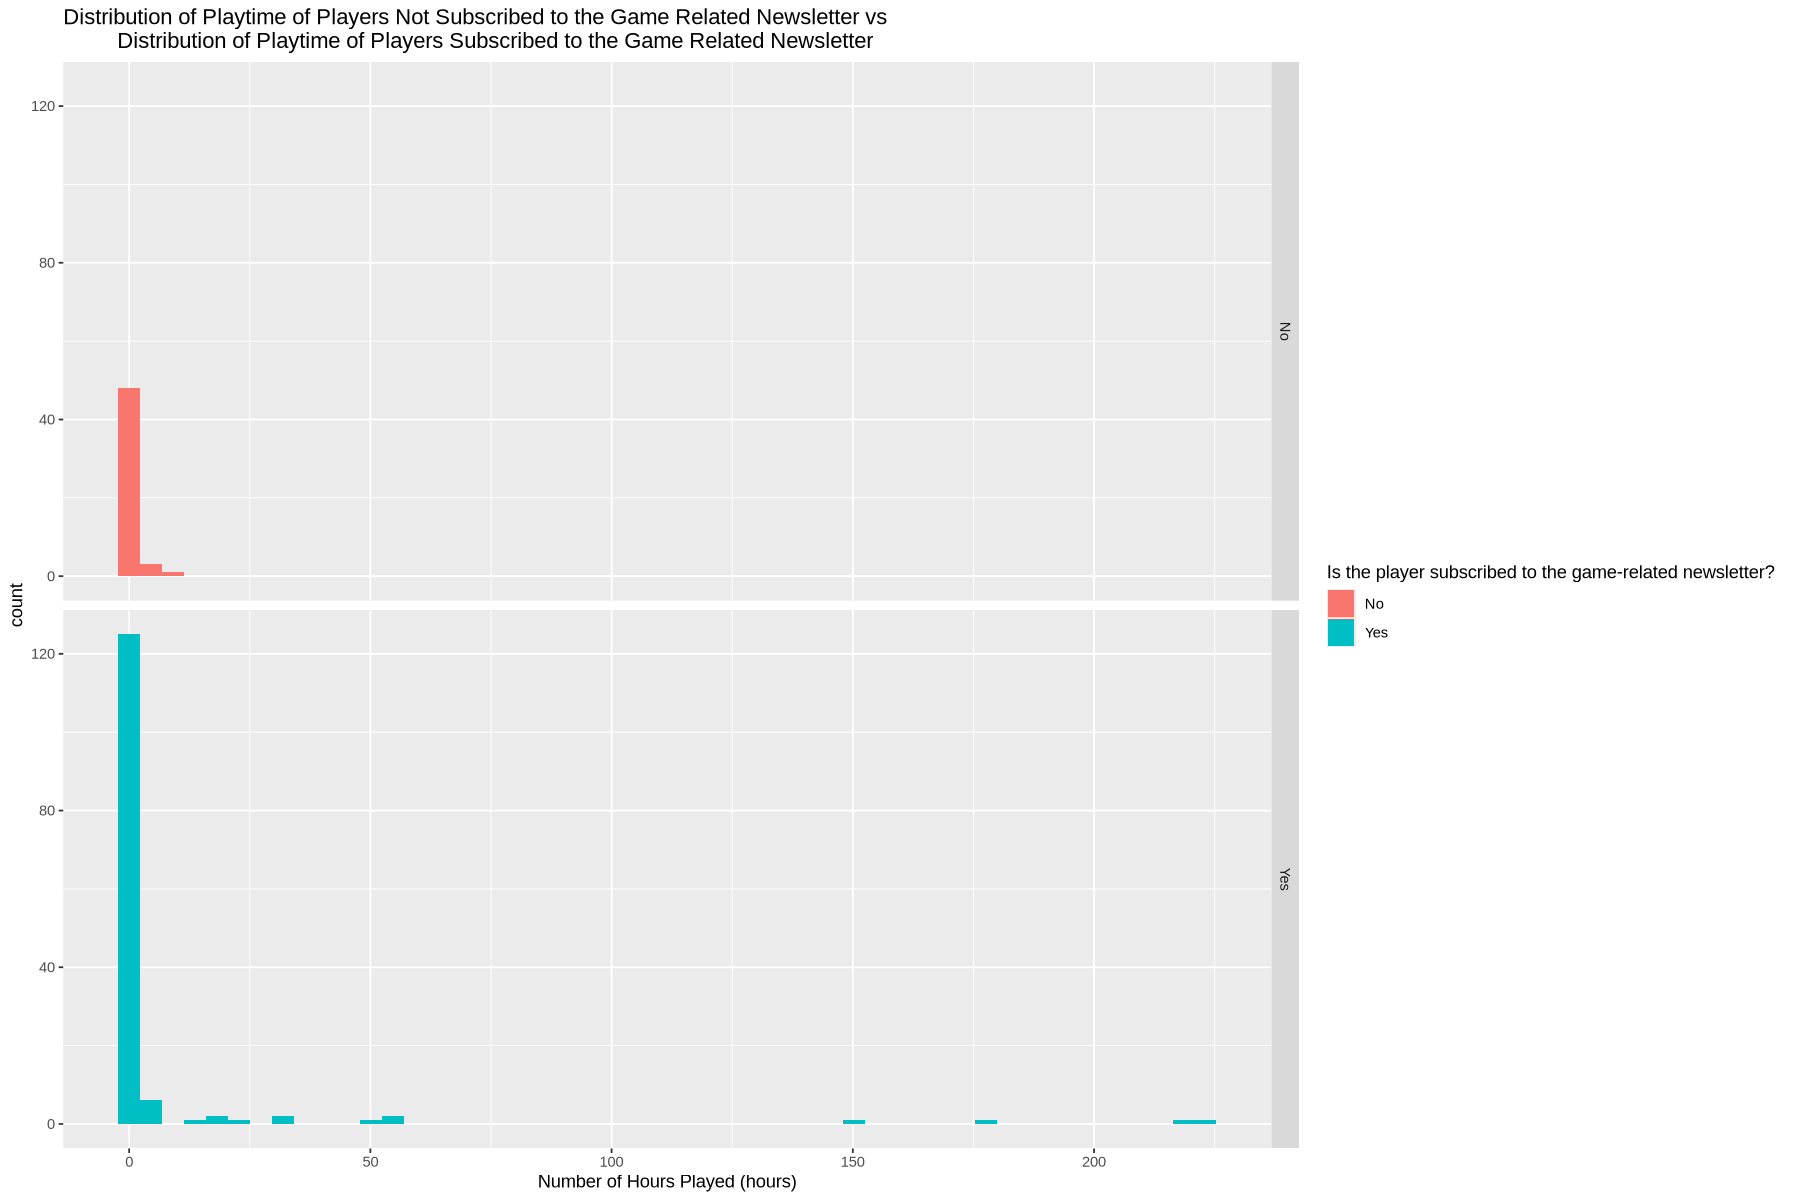

In [10]:
library(scales)
players <- players |>
    mutate(subscribe = as_factor(subscribe)) |>
    mutate(subscribe = fct_recode(subscribe, "Yes" = "TRUE", "No" = "FALSE"))
options(repr.plot.height = 10, repr.plot.width = 15)
playtime_vs_subscription_graph <- ggplot(players, aes(x = played_hours, fill = subscribe)) +
    geom_histogram(bins = 50) +
    facet_grid(rows = vars(subscribe)) +
    labs(title = "Distribution of Playtime of Players Not Subscribed to the Game Related Newsletter vs
         Distribution of Playtime of Players Subscribed to the Game Related Newsletter", 
         x = "Number of Hours Played (hours)", fill = "Is the player subscribed to the game-related newsletter?")

playtime_vs_subscription_graph

Plotting the number of hours played of players who are, and are not, subscribed to the game-related newsletter shows that most players are subscribed. It is quite notable that every single player with >15 hours of playtime is subscribed to the newsletter. This suggests that players with a high number of hours played are likely subscribed. 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


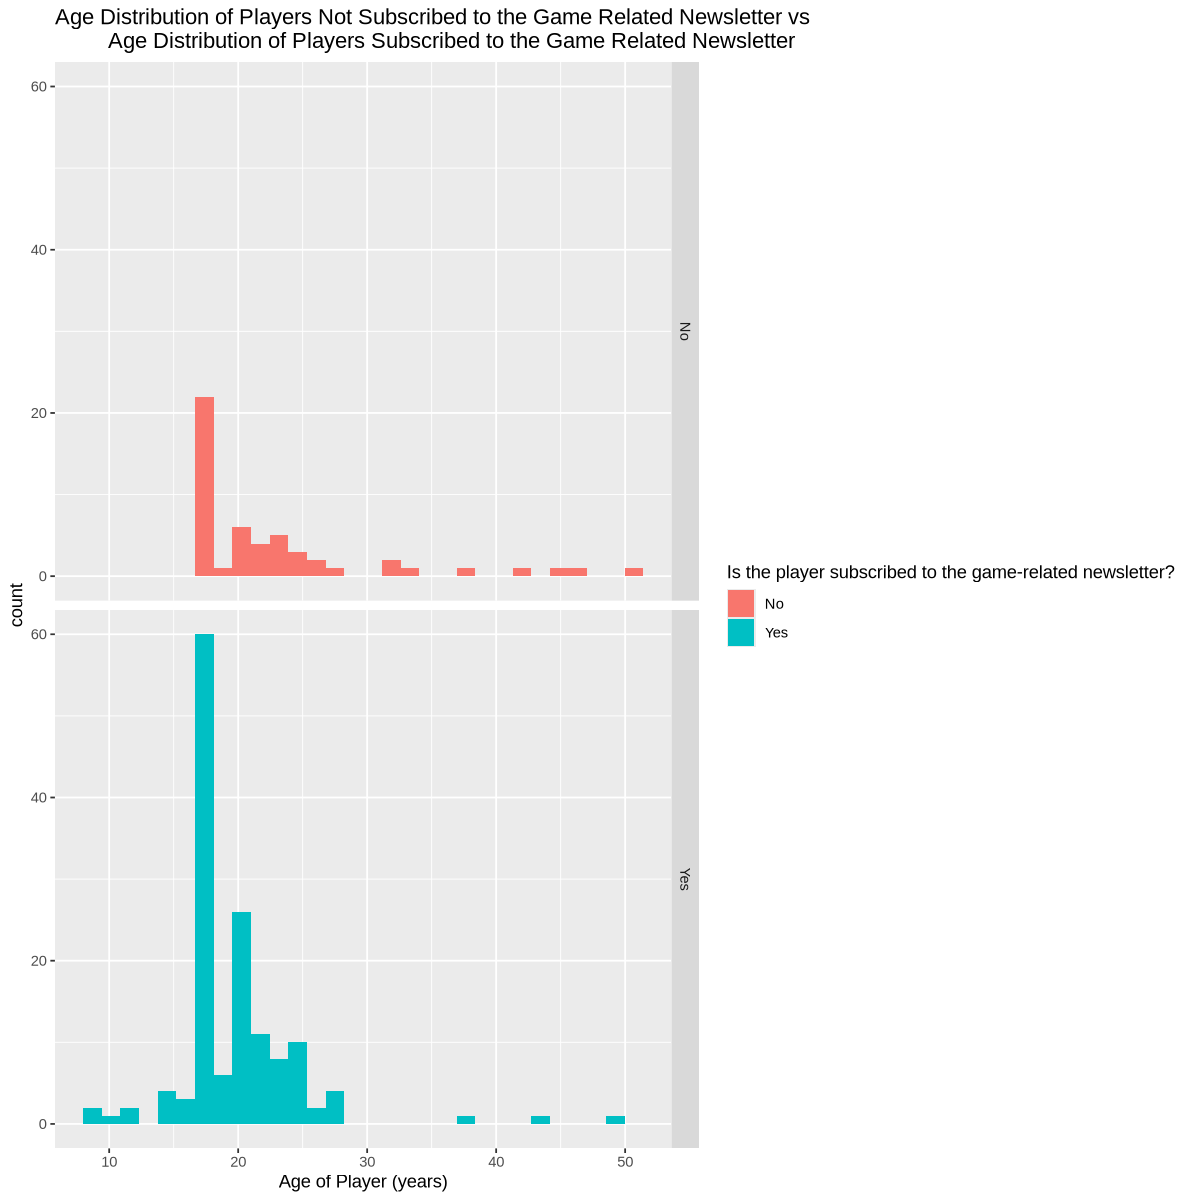

In [19]:
age_vs_subscription_graph <- ggplot(players, aes(x = Age, fill = subscribe)) +
    geom_histogram() +
    facet_grid(rows = vars(subscribe)) +
    labs(title = "Age Distribution of Players Not Subscribed to the Game Related Newsletter vs
         Age Distribution of Players Subscribed to the Game Related Newsletter", 
         x = "Age of Player (years)", fill = "Is the player subscribed to the game-related newsletter?")

age_vs_subscription_graph

Plotting the ages of players subscribed and not subscribed to the game-related newsletter shows that every single player under 15 years old are subscribed to the newsletter, while older players seem to have a slightly increased likelihood of not being subscribed to the newsletter.

# Methods:

The data that will help me address my question is the players.csv file, which contains player age, number of hours played, and newsletter subscription status. KNN classification will be used to predict a player’s subscription status based on age and hours played. Age and number of hours played will both be scaled so that they both contribute equally to the KNN model. The model will be tested with a test set of data. This model assumes that players input their real age, and a potential limitation is that it doesn’t account for gender or experience, which were also given in the players.csv dataset. To process the data, I will split the data into test (30%) and training sets (70%). The training set will be used to perform 5 fold cross-validation to determine the best value of k. Using this value of k, I will test the KNN classification model using the test set of data to determine how accurate the model is at predicting a player’s subscription status based on age and hours played.